# Analyzing Amazon Sales data

Sample Data Set containing Amazon Food category and showing types of food items purchased by respective customer

# In Data Analysis What All Things We Do

* Missing Values
* Explore About the Numerical Variables
* Explore About categorical Variables
* Finding Relationship between features

In [1]:
!pip install abc-analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from abc_analysis import abc_analysis
import matplotlib.ticker as mtick

In [3]:
data = pd.read_excel('SALESDATA.xls')

In [4]:
data.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,237.91,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,456.17,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,438.93,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,211.75,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


In [5]:
data.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Unnamed: 20
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000,0.0
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398,NaN
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936,NaN
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000,NaN
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000,NaN
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000,NaN
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000,NaN
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [7]:
data.shape

(65282, 22)

In [8]:
data.duplicated().sum()

0

In [9]:
data['Item'].value_counts()

Better Fancy Canned Sardines    1648
Ebony Prepared Salad            1471
Moms Sliced Turkey              1192
Imagine Popsicles               1191
Discover Manicotti              1126
                                ... 
Fast Salted Pretzels               1
Great Bagels                       1
Imagine Frozen Cauliflower         1
Jeffers Corn Puffs                 1
Bravo Fancy Canned Sardines        1
Name: Item, Length: 657, dtype: int64

In [10]:
data['CustKey'].value_counts()

10025919    2760
10019194    2752
10012715    1431
10012226    1389
10025025    1143
            ... 
10019469       1
10009660       1
10002140       1
10020227       1
10014059       1
Name: CustKey, Length: 615, dtype: int64

Total number of customers are 615

In [11]:
data1=data.copy()

In [12]:
data1.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,237.91,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,456.17,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,438.93,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,211.75,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


In [13]:
a=data1['Sales Price'].value_counts()

In [14]:
data1.isnull().sum()

CustKey                                 0
DateKey                                 0
Discount Amount                         2
Invoice Date                            0
Invoice Number                          0
Item Class                           8289
Item Number                            41
Item                                    0
Line Number                             0
List Price                              0
Order Number                            0
Promised Delivery Date                  0
Sales Amount                            0
Sales Amount Based on List Price        0
Sales Cost Amount                       0
Sales Margin Amount                     0
Sales Price                             1
Sales Quantity                          0
Sales Rep                               0
U/M                                     0
Unnamed: 20                         65282
Unnamed: 21                         65278
dtype: int64

In [15]:
features =[]
for i in data1.columns:
    if data1[i].isnull().sum()>0:
        features.append(i)

In [16]:
features

['Discount Amount',
 'Item Class',
 'Item Number',
 'Sales Price',
 'Unnamed: 20',
 'Unnamed: 21']

In [17]:
data1.drop(['Unnamed: 20','Unnamed: 21'], axis =1)

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.00,237.91,237.910000,1,184,EA
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.00,456.17,456.170000,1,127,EA
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.00,438.93,438.930000,1,127,EA
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.00,211.75,211.750000,1,160,EA
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.00,89248.66,196.150901,455,124,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65277,10017638,2018-03-21,505.78,2018-03-21,226497,P01,13447,High Top Oranges,8000,119.52,320895,2018-03-21,569.90,1075.68,239.95,329.95,63.322222,9,180,EA
65278,10017638,2018-03-21,410.75,2018-03-21,226497,P01,25906,Landslide White Sugar,38000,436.78,320895,2018-03-21,462.81,873.56,423.55,39.26,231.405000,2,180,EA
65279,10017638,2018-03-21,876.16,2018-03-21,226497,P01,61856,Moms Potato Salad,227001,232.92,320895,2018-03-21,987.20,1863.36,574.00,413.20,123.400000,8,180,EA
65280,10017638,2018-03-21,24226.77,2018-03-21,226498,P01,17801,Better Fancy Canned Sardines,1000,1431.23,320907,2018-03-21,27297.51,51524.28,16188.90,11108.61,758.264167,36,180,EA


In [18]:
r = data1['CustKey'].value_counts()

In [19]:
l=[]
for i in data1['Item'].unique():
    List = i.split(',')
    for i in List:
        l.append(i)

In [20]:
l

['Urban Large Eggs',
 'Moms Sliced Turkey',
 'Cutting Edge Foot-Long Hot Dogs',
 'Kiwi Lox',
 'High Top Sweet Onion',
 'Best Choice Fudge Brownies',
 'Tell Tale Garlic',
 'High Top Walnuts',
 'Big Time Frozen Cheese Pizza',
 'Super Creamy Peanut Butter',
 'Better Fancy Canned Sardines',
 'Red Spade Low Fat Cole Slaw',
 'Jumbo Large Eggs',
 'High Top Corn on the Cob',
 'Moms Low Fat Bologna',
 'Landslide Columbian Coffee',
 'High Top Dried Mushrooms',
 'Gorilla Chocolate Milk',
 'Gorilla Jack Cheese',
 'Ebony Prepared Salad',
 'Bravo Canned Yams',
 'Red Spade Low Fat Bologna',
 'Pearl Chardonnay',
 'Fast Dried Apples',
 'Bravo Large Canned Shrimp',
 'Cutting Edge Turkey Hot Dogs',
 'Red Spade Foot-Long Hot Dogs',
 'Cutting Edge Sliced Ham',
 'Fast Low Fat BBQ Chips',
 'Golden Frozen Chicken Thighs',
 'Imagine Popsicles',
 'Red Spade Turkey Hot Dogs',
 'Fast Low Fat Cookies',
 'American Roasted Chicken',
 'Tell Tale Canned Peanuts',
 'Golden Waffles',
 'BBB Best Strawberry Jelly',
 'Thre

In [21]:
items_count= pd.Series(l).value_counts().sort_index().reset_index().reset_index(drop= True)
items_count.columns = ['Item','Count']
items_count

,Item,Count
0,American Beef Bologna,1
1,American Chicken Hot Dogs,1
2,American Cole Slaw,1
3,American Corned Beef,1
4,American Pimento Loaf,1
...,...,...
652,Washington Diet Cola,1
653,Washington Diet Soda,1
654,Washington Mango Drink,1
655,Washington Orange Juice,1


In [22]:
data1.groupby('Item').sum()['Sales Quantity']

Item
American Beef Bologna           230
American Chicken Hot Dogs       135
American Cole Slaw                2
American Corned Beef           2722
American Pimento Loaf           216
                               ... 
Washington Diet Cola            826
Washington Diet Soda           1423
Washington Mango Drink          478
Washington Orange Juice        2104
Washington Strawberry Drink     134
Name: Sales Quantity, Length: 657, dtype: int64

In [23]:
data1['DateKey'].min()

Timestamp('2017-01-01 00:00:00')

In [24]:
data1['DateKey'].max()

Timestamp('2019-12-31 00:00:00')

In [25]:
data1['month_year']=data1['DateKey'].apply(lambda x : x.strftime('%y-%m'))

In [26]:
data1_trend= data1.groupby('month_year').sum()['Sales Amount'].reset_index()

In [27]:
data1_trend

,month_year,Sales Amount
0,17-01,8650450.48
1,17-02,7216327.65
2,17-03,7567525.47
3,17-04,5650871.78
4,17-05,5988694.88
5,17-06,8674182.00
6,17-07,6391727.78
7,17-08,7749377.54
8,17-09,8786342.38
9,17-10,6368884.91


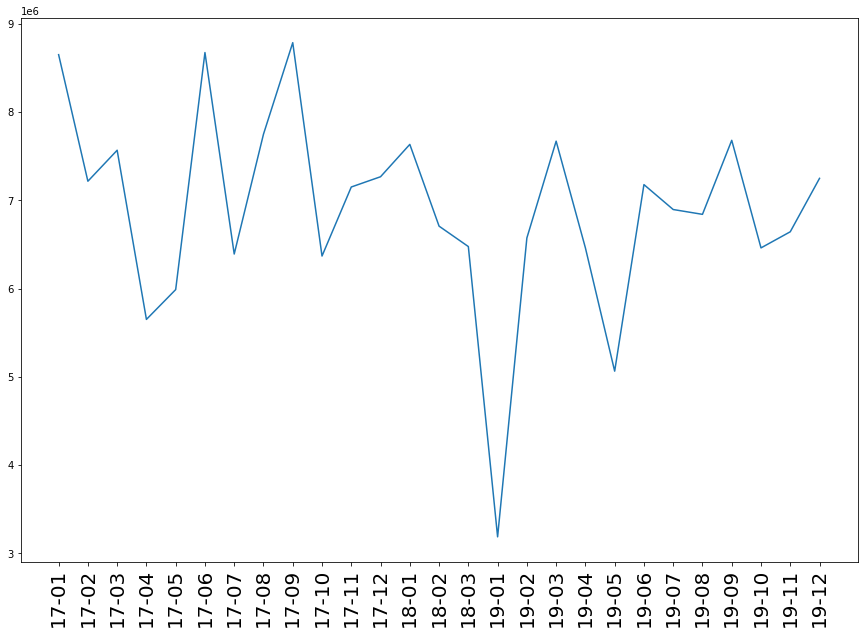

In [28]:
plt.figure(figsize=(15,10))
plt.plot(data1_trend['month_year'],data1_trend['Sales Amount'])
plt.xticks(rotation = 'vertical',size=20)
plt.show()

# So Sale Amount was
* Highest in september 2017
* Lowest in january 2019

In [29]:
proud_sales=pd.DataFrame(data1.groupby('Item').sum()['Sales Amount'])

In [30]:
proud_sales=proud_sales.sort_values('Sales Amount', ascending=False)

# Top 10 items based on sales amount

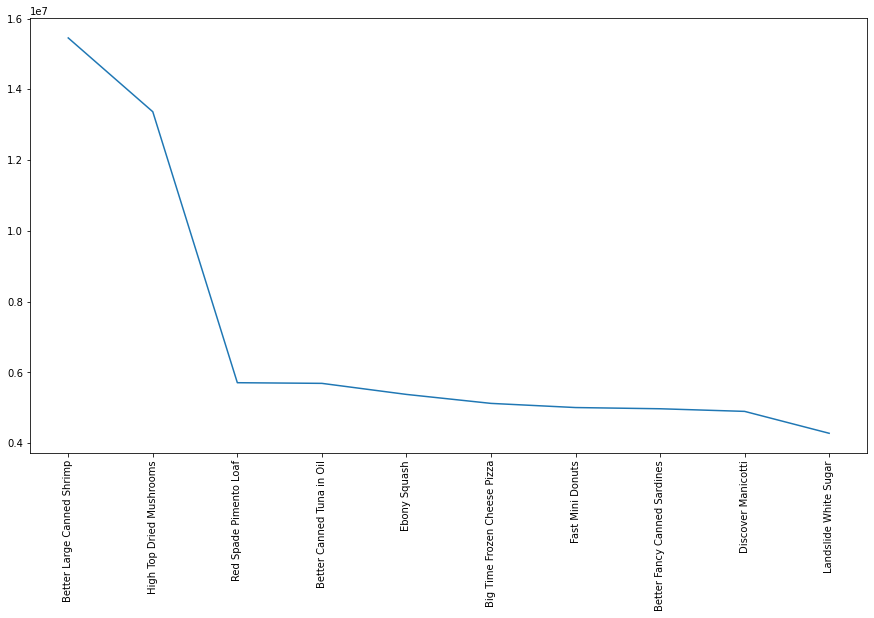

In [31]:
plt.figure(figsize=(15,8))
plt.plot(proud_sales.head(10))
plt.xticks(rotation='vertical',size =10)
plt.show()